In [ ]:
!pip install konlpy

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from tqdm import tqdm

In [ ]:
naver_emo = pd.read_excel("/content/Naver/NAVER_코로나, 감정.xlsx")
naver_mood = pd.read_excel("/content/Naver/NAVER_코로나, 기분.xlsx")
naver_daily = pd.read_excel("/content/Naver/NAVER_코로나, 일상.xlsx")

twitter_emo = pd.read_excel("/content/Twitter/Tweets_코로나, 감정.xlsx")
twitter_mood = pd.read_excel("/content/Twitter/Tweets_코로나, 기분.xlsx")
twitter_daily = pd.read_excel("/content/Twitter/Tweets_코로나, 일상.xlsx")

In [ ]:
naver_emo.rename(columns={'Tweets' : 'Contents'}, inplace=True)
naver_mood.rename(columns={'Tweets' : 'Contents'}, inplace=True)
naver_daily.rename(columns={'Tweets' : 'Contents'}, inplace=True)

In [ ]:
naver_daily

,Date,Weekly Frequency,Contents
0,20200101,558,"[' 일상', '청주 봉명동 농수산물 도매시장 다농마트 물가정보 코로나 예방에 좋은..."
1,20200107,592,"['중국 폐렴 원인 신종 코로나 바이러스 증상 및 예방법은', '마감코로나 잠정연..."
2,20200114,580,['왜 나는 항상 먹고나서 후회할까 원데이클래쓰 차 오픈 코로나 사태로 잠정 보류'...
3,20200121,892,"[' 중국 남경 일상 신종 코로나 바이러스', '월일 화요일 신종 코로나바이러스 긴..."
4,20200201,890,"['캄보디아씨엠립 일상 신종 코로나바이러스 상황', '일상코로나 어린이집휴원', '..."
...,...,...,...
83,20210921,885,"['일상 코로나 시대 인천국제공항 다녀오기', ' 가을 그리고 코로나일상', '일..."
84,20211001,880,"['일상 코로나 백신 접종 완료자가 밀접접촉자로 격리 되는 경우 후기얀센 백신', ..."
85,20211007,886,"['파주 심학산 둘레길트레일 러닝코스코로나 일상', '일상 코로나 바이러스 감염 예..."
86,20211014,882,"['일상 코로나 예방접종화이자 ', '월 프랑스 파리 날씨 위드코로나 일상 ', ..."


In [ ]:
remove = ["없었어요", "었어요", "한번", "적", "것", "한", "하게", "한게", "해요", "합니다",\
          "하여", "해서", "했습니다", "하나요", "할까요", "해가지고", "하니까", "하다고", "했는데"\
          "하면", "할까요", "하고", "했어요", "져서요", "집니다", "납니다", "하지만", "지만",\
          "할", "한걸까요", "까요", "입니다", "어떻게", "없어서", "그래서", "그런데", "그런", "근데", "같이",\
          "가끔", "너무", "때문", "때문에", "자꾸", "있을", "있는", "요즘", "약간", "영어",\
          "이런", "왜", "이럴까요", "저희", "우리", "많이", "계속", "다시", "이틀", "지금", "코로나", "백신",\
          "그냥", "부터", "승무원", '해도', "언젠가", "있으면", "시어머니", "아버님", "통장", "있고", "문장",\
          "현재", "치매", "해도", "있으면", "있고", "감정", "있었음", "있어요",\
          "그래도", "진자", "오늘", "같은", "기분", "진짜", "정말", "이번", "없는", "이렇게", "없이", "일상", "이제"]

In [ ]:
def get_morphs(df_naver, df_twitter):
    twt = Twitter()

    global remove
    morphs = []
    morphs_twt = []

    for sentence in tqdm(df_naver['Contents']):
        morph = twt.pos(sentence)
        morphs.append(morph)

    for sentence in tqdm(df_twitter['Tweets']):
        morph = twt.pos(sentence)
        morphs_twt.append(morph)

    return morphs, morphs_twt 

def get_freqs_all(morphs, morphs_twt, keyword):
    words = []
    for sentence in tqdm(morphs):
        for elem in sentence:
          if elem[1] in ["Noun", "Adjective", "Adverb"]:
              tmp = elem[0]
              for r in remove:
                  tmp = tmp.replace(r, "")
              if tmp:
                words.append(tmp)

    words_twt = []
    for sentence in tqdm(morphs_twt):
        for elem in sentence:
          if elem[1] in ["Noun", "Adjective", "Adverb"]:
              tmp = elem[0]
              for r in remove:
                  tmp = tmp.replace(r, "")
              if tmp:
                words_twt.append(tmp)

    words = [word for word in words if len(word) > 1]
    words_twt = [word for word in words_twt if len(word) > 1]

    words_total = words + words_twt

    counter_total = Counter(words_total)
    freqs_total = counter_total.most_common(500)
    print(freqs_total[:30])

    freqs_total_df = pd.DataFrame(freqs_total, columns=['키워드', '빈도수'])
    freqs_total_df.to_excel(keyword + "_total_freq.xlsx")

    return freqs_total


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
fontpath="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath)

In [ ]:
from wordcloud import ImageColorGenerator
from PIL import Image

mask = np.array(Image.open('/content/cloud2.jpg'))
colors = ImageColorGenerator(mask)

In [ ]:
def get_wordcloud(freqs, add_stopwords):
    stopwords = ["기초", "같고", "자주", "인해", "아이"]
    stopwords += add_stopwords
    
    wordcloud = WordCloud(font_path=fontpath, 
                          background_color="black",
                          relative_scaling=0.5,
                          colormap='tab20c',
                          mask = mask,
                          stopwords=stopwords,
                          contour_color='black',
                          )
    cloud = wordcloud.generate_from_frequencies(dict(freqs))
    plt.figure(figsize=(25, 8))
    plt.axis("off")
    plt.imshow(cloud)
    plt.show()

## **코로나 + 감정 from Naver, Twitter**

In [ ]:
morphs_emo, morph_emo_twt = get_morphs(naver_emo, twitter_emo)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|██████████| 88/88 [00:23<00:00,  3.67it/s]


In [ ]:
morphs_emo
morph_emo_twt

In [ ]:
emo_freqs = get_freqs_all(morphs_emo, morph_emo_twt, "감정")

100%|██████████| 88/88 [00:00<00:00, 117.49it/s]


[('아이', 3647), ('마음', 3625), ('블루', 3284), ('사람', 2868), ('생각', 2705), ('시대', 2594), ('바이러스', 2508), ('시간', 1914), ('우울', 1795), ('인해', 1763), ('상황', 1734), ('불안', 1581), ('극복', 1552), ('이후', 1502), ('스트레스', 1468), ('엄마', 1348), ('함께', 1325), ('생활', 1287), ('사회', 1266), ('코칭', 1261), ('표현', 1226), ('심리', 1120), ('검사', 1119), ('많은', 1118), ('있다', 1118), ('조절', 1059), ('교육', 1053), ('방법', 1029), ('건강', 1029), ('시작', 1027)]


In [ ]:
emo_freqs[:30]

[('아이', 3647),
 ('마음', 3625),
 ('블루', 3284),
 ('사람', 2868),
 ('생각', 2705),
 ('시대', 2594),
 ('바이러스', 2508),
 ('시간', 1914),
 ('우울', 1795),
 ('인해', 1763),
 ('상황', 1734),
 ('불안', 1581),
 ('극복', 1552),
 ('이후', 1502),
 ('스트레스', 1468),
 ('엄마', 1348),
 ('함께', 1325),
 ('생활', 1287),
 ('사회', 1266),
 ('코칭', 1261),
 ('표현', 1226),
 ('심리', 1120),
 ('검사', 1119),
 ('많은', 1118),
 ('있다', 1118),
 ('조절', 1059),
 ('교육', 1053),
 ('방법', 1029),
 ('건강', 1029),
 ('시작', 1027)]

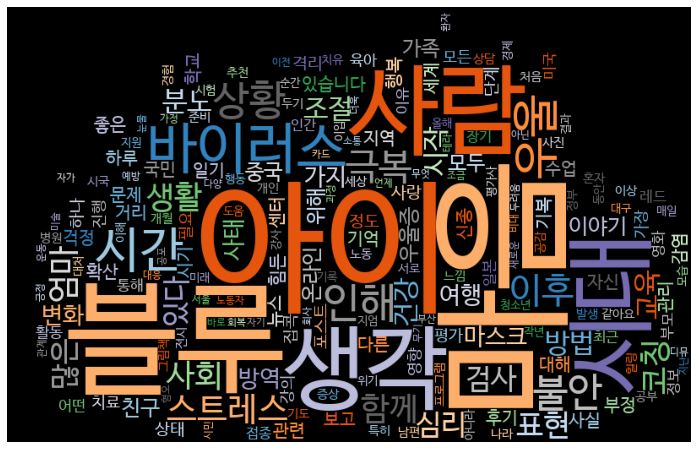

In [ ]:
get_wordcloud(emo_freqs, [])

---

## **코로나 + 기분 from Naver, Twitter**

In [ ]:
morphs, morphs_twt = get_morphs(naver_mood, twitter_mood)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|██████████| 88/88 [01:17<00:00,  1.13it/s]


In [ ]:
morphs
morphs_twt

In [ ]:
mood_freqs = get_freqs_all(morphs, morphs_twt, "기분")

100%|██████████| 88/88 [00:03<00:00, 27.12it/s]


[('검사', 5808), ('접종', 3805), ('좋은', 3364), ('전환', 3328), ('사람', 3164), ('일상', 2946), ('여행', 2906), ('마스크', 2594), ('생각', 2505), ('블루', 2478), ('바이러스', 2473), ('후기', 2410), ('시간', 2144), ('시대', 2048), ('마음', 1965), ('하루', 1714), ('아이', 1620), ('우울', 1579), ('시작', 1493), ('극복', 1396), ('이후', 1370), ('생활', 1310), ('화이자', 1246), ('좋게', 1224), ('거리', 1196), ('상황', 1185), ('격리', 1179), ('인해', 1160), ('이제', 1155), ('집콕', 1142)]


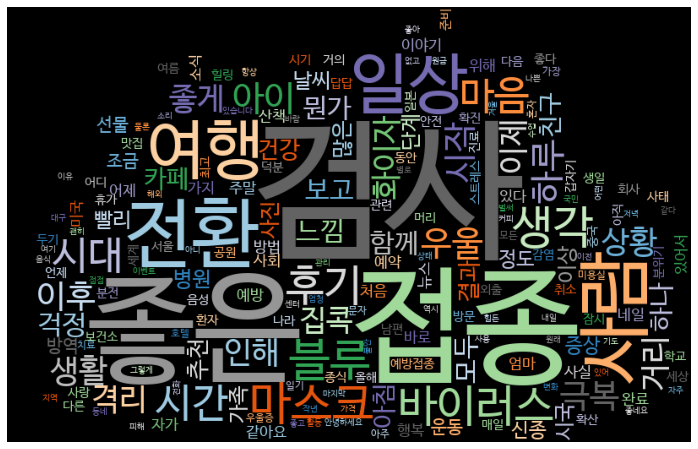

In [ ]:
get_wordcloud(mood_freqs, ["그래도", "진자", "오늘", "같은", "기분", "진짜", "정말", "이번", "없는", "이렇게", "없이"])

## **코로나 + 일상 from Naver, Twitter**

In [ ]:
morphs_daily, morphs_daily_twt = get_morphs(naver_daily, twitter_daily)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|██████████| 86/86 [02:16<00:00,  1.58s/it]


In [ ]:
morphs_daily
morphs_daily_twt

In [ ]:
daily_freqs = get_freqs_all(morphs_daily, morphs_daily_twt, "일상")

100%|██████████| 86/86 [00:04<00:00, 17.32it/s]


[('생활', 4734), ('마스크', 4150), ('접종', 4043), ('회복', 3428), ('바이러스', 3316), ('사람', 2924), ('출장', 2815), ('단계', 2593), ('검사', 2592), ('시간', 2557), ('하루', 2497), ('위드', 2420), ('시작', 2301), ('함께', 2279), ('거리', 2218), ('여행', 2199), ('생각', 2139), ('아이', 2085), ('방역', 2073), ('집콕', 2051), ('카페', 1975), ('재앙', 1951), ('만남', 1950), ('미국', 1938), ('이후', 1781), ('시대', 1772), ('모두', 1662), ('사회', 1587), ('행복', 1586), ('상황', 1544)]


In [ ]:
daily_freqs[:30]

[('생활', 4734),
 ('마스크', 4150),
 ('접종', 4043),
 ('회복', 3428),
 ('바이러스', 3316),
 ('사람', 2924),
 ('출장', 2815),
 ('단계', 2593),
 ('검사', 2592),
 ('시간', 2557),
 ('하루', 2497),
 ('위드', 2420),
 ('시작', 2301),
 ('함께', 2279),
 ('거리', 2218),
 ('여행', 2199),
 ('생각', 2139),
 ('아이', 2085),
 ('방역', 2073),
 ('집콕', 2051),
 ('카페', 1975),
 ('재앙', 1951),
 ('만남', 1950),
 ('미국', 1938),
 ('이후', 1781),
 ('시대', 1772),
 ('모두', 1662),
 ('사회', 1587),
 ('행복', 1586),
 ('상황', 1544)]

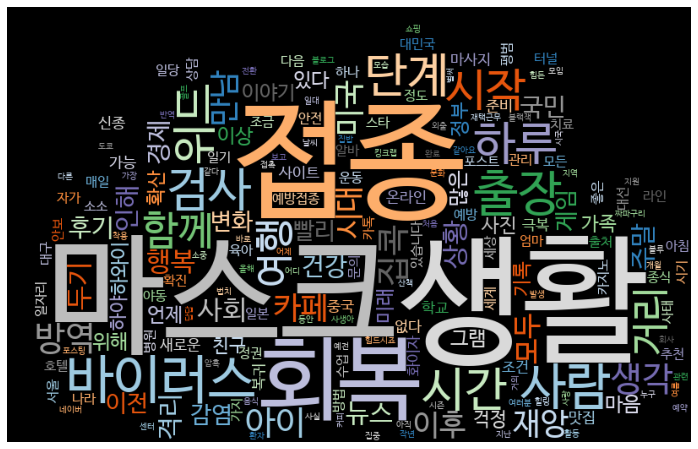

In [ ]:
get_wordcloud(daily_freqs, ["일상", "이제"])